# Project 2: Topic Classification
### DATASCI W207 - Due Date 3/14/16 - Greg Ceccarelli

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [159]:
def line(length=80):
    line = "-"
    return(line * length + '\n')

In [160]:
def P1(num_examples=5):
### STUDENT START ###
    for i in range(0,num_examples-1):
        print "Example #%d" %(i)
        print line()
        print "Message Category #%d, Message Label %s \n" %(train_labels[i], newsgroups_train.target_names[train_labels[i]])
        print "Message Text: \n"
        print train_data[i] + "\n"
### STUDENT END ###
P1()

Example #0
--------------------------------------------------------------------------------

Message Category #1, Message Label comp.graphics 

Message Text: 

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Example #1
--------------------------------------------------------------------------------

Message Category #3, Message Label talk.religion.misc 

Message Text: 



Seems to be, barring evidence to the contrary, that Koresh was 

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [161]:
def P2():
### STUDENT START ###

    print "Part A"
    print line()
    cv = CountVectorizer()
    sparse_mat = cv.fit_transform(train_data)
    print "1. Vocabulary size: %d words." %sparse_mat.shape[1]
    print "2. Average number of nonzero features: %.2f words." % (sparse_mat.nnz / float(sparse_mat.shape[0]))
    print "3. The fraction of non-zero entries as a percentage: %.2f." % (round(sparse_mat.nnz / (float(sparse_mat.shape[0] * sparse_mat.shape[1]))*100,2))


    print "\nPart B"
    print line()
    features = cv.get_feature_names()
    print "1. The 0th feature string (in alphabetical order) is '%s'" %features[0]
    print "2. The last feature string (in alphabetical order) is '%s'" %features[-1]

    print "\nPart C"
    print line()
    vocab = ["atheism", "graphics", "space", "religion"]
    cv = CountVectorizer(vocabulary = vocab)
    sparse_mat = new_cv.fit_transform(train_data)
    print "1. Sparse Mat Shape: %s" % (sparse_mat.shape,)
    print "2. Average number of nonzero features: %.2f words." % (sparse_mat.nnz / float(sparse_mat.shape[0]))
    ##expect this to be MUCH higher
    print "3. The fraction of non-zero entries as a percentage: %.2f." % (round(sparse_mat.nnz / (float(sparse_mat.shape[0] * sparse_mat.shape[1]))*100,2))

    print "\nPart D"
    print line()
    cv = CountVectorizer(analyzer='char', ngram_range=(2,3))
    sparse_mat = cv.fit_transform(train_data)
    print "1. Vocab Size: %d words." %sparse_mat.shape[1]

    print "\n Part E"
    print line()
    cv = CountVectorizer(min_df=10)
    sparse_mat = cv.fit_transform(train_data)
    print "1. Vocab Size: %d words." %sparse_mat.shape[1]

    print "\n Part F"
    print line()
    cv_train = CountVectorizer()
    cv_dev = CountVectorizer()


    #build  model w/ training data
    sparse_mat_train = cv_train.fit_transform(train_data)

    #build model w/ dev data
    sparse_mat_dev = cv_dev.fit_transform(dev_data)

    print "1. Training Vocab is %d words." %sparse_mat_train.shape[1]
    print "2. Dev Vocab is %d words." %sparse_mat_dev.shape[1]

    count_words_not_in_dev = len(set(cv_dev.get_feature_names()) - set(cv_train.get_feature_names()))

    print "3. Fraction of words missing %.2f%% " % (round(count_words_not_in_dev / float(sparse_mat_dev.shape[1]) *100,2))

                
# ### STUDENT END ###
P2()

Part A
--------------------------------------------------------------------------------

1. Vocabulary size: 26879 words.
2. Average number of nonzero features: 96.71 words.
3. The fraction of non-zero entries as a percentage: 0.36.

Part B
--------------------------------------------------------------------------------

1. The 0th feature string (in alphabetical order) is '00'
2. The last feature string (in alphabetical order) is 'zyxel'

Part C
--------------------------------------------------------------------------------

1. Sparse Mat Shape: (2034, 4)
2. Average number of nonzero features: 0.27 words.
3. The fraction of non-zero entries as a percentage: 6.71.

Part D
--------------------------------------------------------------------------------

1. Vocab Size: 35478 words.

 Part E
--------------------------------------------------------------------------------

1. Vocab Size: 3064 words.

 Part F
--------------------------------------------------------------------------------


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [162]:
def P3():
### STUDENT START ###

    #class instantiation
    cv = CountVectorizer()

    #learn vocab dictionary
    sparse_mat = cv.fit_transform(train_data)

    #define quick wrapper function
    def gridsearch(classifier, param_grid, scoring='f1_weighted'):
        gs = GridSearchCV(classifier, param_grid, scoring)
        gs.fit(sparse_mat, train_labels)
        return([gs.best_params_, gs.best_score_])

    #define grid search parameters
    knn_param = {'n_neighbors': range(1,20)}
    mnb_param = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    plr_param = {'C': np.arange(0.25, 5, 0.25)}

    #fit models
    print "\n Part A: KNN"
    print line()
    knn = gridsearch(KNeighborsClassifier(), knn_param)
    print "Best: %s with accuracy %.4f" % (knn[0], knn[1])

    print "\n Part b: Multinomial NB"
    print line()
    mnb = gridsearch(MultinomialNB(), mnb_param)
    print "Best: %s with accuracy %.4f" % (mnb[0], mnb[1])

    print "\n Part c: Penalized Regression"
    print line()
    plr = gridsearch(LogisticRegression(penalty='l2'), plr_param)
    print "Best: %s with accuracy %.4f" % (plr[0], plr[1])
    print "\n"
    # Report out on the accuracies 
    for c in plr_param['C']:
        model = LogisticRegression(C=c, penalty='l2')
        model.fit(sparse_mat, train_labels)
        predict_dev = model.predict(cv.transform(dev_data))
        print "C = %f, Accuracy = %f" % (c, metrics.f1_score(dev_labels, predict_dev, average='weighted'))
        print np.sum(model.coef_**2, axis=1)
        print "\n"


### STUDENT END ###
P3()


 Part A: KNN
--------------------------------------------------------------------------------

Best: {'n_neighbors': 19} with accuracy 0.4162

 Part b: Multinomial NB
--------------------------------------------------------------------------------

Best: {'alpha': 0.01} with accuracy 0.8287

 Part c: Penalized Regression
--------------------------------------------------------------------------------

Best: {'C': 0.25} with accuracy 0.7679


C = 0.250000, Accuracy = 0.708058
[ 59.80517871  50.61764425  58.95521892  51.48001019]


C = 0.500000, Accuracy = 0.708474
[ 102.62144048   83.10348285   99.02069038   88.99275007]


C = 0.750000, Accuracy = 0.692467
[ 137.3188418   108.97681678  130.97051009  119.48949713]


C = 1.000000, Accuracy = 0.694417
[ 166.97755478  130.90016943  157.95888557  145.74392086]


C = 1.250000, Accuracy = 0.694841
[ 193.11000856  150.27994931  181.53253414  168.92481973]


C = 1.500000, Accuracy = 0.689000
[ 216.56092836  167.53979719  202.84894395  189.82528

ANSWER: 

A: KNN doesn't work well with a very sparse matrix of many features that differ between training examples. It's not suprising the classifier scores low on accuracy.

B: NB assumes independence between features. For each potential classification, a likelihood of classification given each independent feature is calculated. Logistic Regression on the other hand, attempts to draw a line to separate the data points. Since the matrix is extremly spase, it makes sense that NB performs better.

C: L2 regularization penalizes large coefficients, because large coefficients are more likely to occur when we are overfitting. Low values of C leads to lower model coefficients beacuse of higher regularization penalites

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [279]:
def P4():
### STUDENT START ###
    def f(CV, Model, td, labels, targetnames):
        cv = CV
        #learn vocab
        sparse_mat = cv.fit_transform(td)
        #get names
        names = np.array(cv.get_feature_names())
        #instantiate model
        model = Model
        #fit model
        model.fit(sparse_mat, labels)
        #save coeficients
        coefs = model.coef_
        #find indiices of top five coefficients 
        indicies = np.argpartition(coefs, -5)[:,-5:].flatten()

        cols = len(np.unique(labels))
        table = np.zeros((20, cols))
        for idx in range(0, cols):
            table[:,idx] = coefs[idx,indicies]

        def pad(vals, row):
            ml = np.amax(len(vals))
            pad = (ml - 10 - len(row))
            return(" " * pad)

        #print everything out
        print " " * 11, targetnames
        for row_label, row in zip(names[indicies], table):
            print '%s %s [%s]' % (row_label, pad(names[indicies], row_label), ' '.join('%03s' % i for i in row))

    f(CountVectorizer(), LogisticRegression(C=.25, penalty='l2'), train_data, train_labels, newsgroups_train.target_names)
    print "\n"
    f(CountVectorizer(ngram_range=(2,3)), LogisticRegression(C=.25, penalty='l2'), train_data, train_labels, newsgroups_train.target_names)

### STUDENT END ###
P4()

            ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
islam       [0.562789997538 -0.0965687174455 -0.229953582418 -0.232211700715]
atheism     [0.657037419194 -0.288323110405 -0.289801734147 -0.327085456402]
atheists    [0.657219772063 -0.0889383409102 -0.217346253141 -0.468192702889]
religion    [0.657337096801 -0.410745469758 -0.536794333485 -0.0277585299963]
bobby       [0.667508309574 -0.160997288874 -0.233053622069 -0.315221870578]
computer    [0.0109384681592 0.719382908141 -0.460662339579 -0.3169376079]
3d          [-0.249027480386 0.765342027341 -0.450607619141 -0.256902637536]
file        [-0.227324228231 0.867445988537 -0.564952796066 -0.402737218303]
image       [-0.370281242719 0.900180457812 -0.530174731498 -0.303047952898]
graphics    [-0.534888696715 1.34176223142 -0.891980636904 -0.506467154892]
spacecraft  [-0.241105926968 -0.258161369858 0.572710455648 -0.217108230341]
launch      [-0.296922434929 -0.329587082918 0.643359750279 -0.2302768080

ANSWER: For unigrams, suprisingly "islam" is a highly weighted feature in the alt.atheism newsgroup but not the talk.religion.misc group. Also, it was fairly suprising to see "fbi" be such a highly weighted feature in talk.religion.misc.

For the bigrams, I'm suprised to see so many stop words included. Some of the prepositional phrases make a lot of sense, however; for example "Looking for" in comp.graphics makes sense -- people
probably ask a lot of questions in those channels.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [232]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
    s = s.lower()
    regex_list = [(r'\b[0-9]+[.,]*[0-9]+\b','not words'),(r'[><_]',''),(r's\b','')]
    for idx, val in enumerate(regex_list):
        s = re.sub(val[0],val[1],s)
    return s

### STUDENT END ###

def P5():
### STUDENT START ###
    def  f(CV, Model, td, labels, devdata, devlabels):
        cv = CV
        #learn vocab
        sparse_mat = cv.fit_transform(td)
        #get names
        names = np.array(cv.get_feature_names())
        #instantiate model
        model = Model
        #fit model
        model.fit(sparse_mat, labels)
        #transform dev data
        devdata = cv.transform(devdata)
        
        print "Vocab size: %d words" %(sparse_mat.shape[1])
        accuracy = metrics.f1_score(devlabels, model.predict(devdata), average='weighted')
        print "Model Accuracy: %f" % (accuracy)
        return (sparse_mat.shape[1], accuracy)
    
    print "No preprocessing:"
    print line()
    npp = f(CountVectorizer(preprocessor=empty_preprocessor), LogisticRegression(C=.25, penalty='l2'), train_data, train_labels, dev_data, dev_labels)
    print "\n"
    print "With preprocessing:"
    print line()
    wpp = f(CountVectorizer(preprocessor=better_preprocessor), LogisticRegression(C=.25, penalty='l2'), train_data, train_labels, dev_data, dev_labels)
    print "\n"
    print "Model Improvements"
    print line()
    print "Vocab reduction: %s words, Accuracy Increase: %f" % (npp[0] - wpp[0], wpp[1] - npp[1])


### STUDENT END ###
P5()

No preprocessing:
--------------------------------------------------------------------------------

Vocab size: 33291 words
Model Accuracy: 0.704429


With preprocessing:
--------------------------------------------------------------------------------

Vocab size: 22244 words
Model Accuracy: 0.722269


Model Improvements
--------------------------------------------------------------------------------

Vocab reduction: 11047 words, Accuracy Increase: 0.017840


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

--------------------------------------------------------------------------------

L2 Accuracy = 0.703538, with 107516 nonzero weights
--------------------------------------------------------------------------------

L1 Accuracy = 0.694549, with 747 nonzero weights
--------------------------------------------------------------------------------

L2 Accuracy w/ L1 features = 0.679103
Looping through features


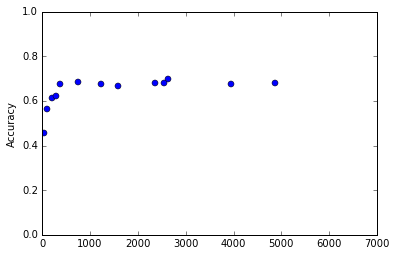

In [278]:
def P6():
        # Keep this random seed here to make comparison easier.
    np.random.seed(0)

        ### STUDENT START ###
    def  f(CV, Model, td, labels, devdata, devlabels, indicies):
        cv = CV

        if len(indicies) != 0:
            sparse_mat = cv.fit_transform(td)
            sparse_mat = sparse_mat[:,indicies] 
            devdata =  cv.transform(devdata)
            devdata = devdata[:,indicies]
        else:
            #learn vocab
            sparse_mat = cv.fit_transform(td)
            #get names
            names = np.array(cv.get_feature_names())
            devdata = cv.transform(devdata)

            #instantiate model

        model = Model
        #fit model
        model.fit(sparse_mat, labels)
        #transform dev data
        #determine accuracy
        accuracy = metrics.f1_score(devlabels, model.predict(devdata), average='weighted')
        #count nonzero coefficients
        cnt_nz_weights = np.count_nonzero(model.coef_)
        #determine which features are nonzero and save their indicies
        nz_indicies = np.nonzero(np.sum(model.coef_, axis=0))
        return ([sparse_mat.shape[1], accuracy, cnt_nz_weights, nz_indicies])

    l2 = f(CountVectorizer(), LogisticRegression(C=.25, penalty='l2', tol=.01), train_data, train_labels, dev_data, dev_labels,[])
    l1 = f(CountVectorizer(), LogisticRegression(C=.25, penalty='l1', tol=.01), train_data, train_labels, dev_data, dev_labels,[])

    print line()
    print "L2 Accuracy = %f, with %i nonzero weights" % (l2[1], l2[2])

    print line()
    print "L1 Accuracy = %f, with %i nonzero weights" % (l1[1], l1[2])

    #feed in nonzero weights from  l1 model to l2 model
    l2nz = f(CountVectorizer(), LogisticRegression(C=.25, penalty='l2', tol=.01), train_data, train_labels, dev_data, dev_labels, l1[3][0])
    print line()
    print "L2 Accuracy w/ L1 features = %f" % (l2nz[1])

    # Iterate through Cs, saving accuracy and vocab size
    C = [0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 5.0, 10.0, 25.0, 50.0]

    accuracies = []
    features = []

    print "Looping through features"
    for val in C:
        l1 = f(CountVectorizer(), LogisticRegression(C=val, penalty='l1', tol=.01), train_data, train_labels, dev_data, dev_labels,[])

        # Features where L1 weights not = 0
        features.append(l1[2]) 

        # Retrain L2 with only nz features
        l2nz = f(CountVectorizer(), LogisticRegression(C=val, penalty='l2', tol=.01), train_data, train_labels, dev_data, dev_labels, l1[3][0])

        accuracies.append(l2nz[1])

    # Plot accuracy vs. vocab size.
    plt.plot(features, accuracies, 'bo')
    plt.ylabel('Accuracy')
    plt.axis([0, 7000, 0, 1])

    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [283]:
#def P7():
### STUDENT START ###
def  f(CV, Model, td, labels, devdata, devlabels):
        cv = CV
        #learn vocab
        sparse_mat = cv.fit_transform(td)
        #get names
        names = np.array(cv.get_feature_names())
        devdata = cv.transform(devdata)

        #instantiate model
        model = Model
        #fit model
        model.fit(sparse_mat, labels)
        #transform dev data
        #determine accuracy
        accuracy = metrics.f1_score(devlabels, model.predict(devdata), average='weighted')
        #count nonzero coefficients
        cnt_nz_weights = np.count_nonzero(model.coef_)
        #determine which features are nonzero and save their indicies
        nz_indicies = np.nonzero(np.sum(model.coef_, axis=0))
        
        ps = model.predict_proba(devdata)
        maxp = np.max(ps, axis = 1)
        corrp = ps[np.arange(ps.shape[0]), devlabels]
        R = maxp / corrp
        Rmax = np.argpartition (R,-3)[-3:]
    
        for idx in Rmax:
            print "Classified as: %s" % newsgroups_train.target_names[model.predict(devdata)[idx]]
            print "Actually: %s" % newsgroups_train.target_names[devlabels[idx]]
            print line()
            print dev_data[idx]
             
        return ([sparse_mat.shape[1], accuracy, cnt_nz_weights, nz_indicies, Rmax])

m1 = f(CountVectorizer(), LogisticRegression(C=100, penalty='l2', tol=.01), train_data, train_labels, dev_data, dev_labels)
m2 = f(TfidfVectorizer(), LogisticRegression(C=100, penalty='l2', tol=.01), train_data, train_labels, dev_data, dev_labels)
## STUDENT END ###
P7()

Classified as: talk.religion.misc
Actually: alt.atheism
--------------------------------------------------------------------------------

John E. King (king@ctron.com) posts a whopping one liner:

 * "The modern theory of evolution is so inadequate that it deserves to be *
 *  treated as a matter of faith." -- Francis Hitching                     *

  I have a few points to make about the above posting.

    1. Science is not based on and does not consist of "quotes" from either
    real or alleged experts.  Critical reasoning, evidence and (if possible)
    experimentation are necessary.  Creationists frequently display a massive
    confusion about this by merely quoting both non-experts and experts alike
    (some of the latter quotes are in fact false) and steadfastly refusing to
    follow any kind of rigorous scientific procedure.  This strongly suggests
    that (a.) their claims completely lack any scientific merit and (b.) they
    are aware of this fatal deficiency.  Of cours

ANSWER: CountVectorizor returns a matrix of counts for the number of times a word occurs in a document. TfIdf applies the tf-idf formula to return a score for each word based on its importance of the word to search results. 

In the discussion about mormons, many abbreviations are used including a discussion about FTP and "Postscript" -- thus they're being classified as comp.graphics. The thid document is even stranger...it's a short sentence about a lone gunman nuanced - that is being misclassified as talk.relgion when it's really alt.atheism.

A simple possible solution to these problems would be to create a list of stop words commonly found / unique to one newsgroup and remove it from all the data from the other group(s). That way, only those words unique to a certain newsgroup would be used to classify it. 

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

###Did not complete...